## CIC-DDOS 2019 Dataset

## Table of contents:

1. [Importing libraries](#Libraries)
2. [Loading data](#Data)
3. [Statistical summaries](#Statistics)
4. [Exploratory Data Analysis](#EDA)
5. [Preprocess dataset](#Preprocess)
6. [Model Building](#Modelling)

In [94]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 14.9/14.9 MB 6.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\abhip\\AppData\\Roaming\\Python\\Python39\\site-packages\\~umpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Check the permissions.



In [4]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 376.9/376.9 MB 363.6 kB/s eta 0:00:00
     -------------------------------------- 65.5/65.5 kB 391.8 kB/s eta 0:00:00
     ------------------------------------ 413.4/413.4 kB 759.2 kB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 417.1 kB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 635.4 kB/s eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 3.8/3.8 MB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 15.8/15.8 MB 3.9 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 kB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you hav

In [6]:
pip install numpy --upgrade

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pyarrow

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 24.9/24.9 MB 665.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install fastparquet

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 670.2/670.2 kB 234.6 kB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 503.6 kB/s eta 0:00:00
     -------------------------------------- 11.6/11.6 MB 392.2 kB/s eta 0:00:00
     ------------------------------------ 345.4/345.4 kB 456.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [92]:
pip install pydot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


<a name="Libraries"></a>
## 1. Importing libraries

In [3]:
import os
import warnings
import numpy as np
from matplotlib.pyplot import figure
%matplotlib inline
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn import svm
import tensorflow as tf
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.svm import SVC, LinearSVC
pd.set_option('display.max_columns',None)
from tensorflow.keras import regularizers
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor,BaggingClassifier, VotingClassifier

C:\Users\abhip\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\abhip\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<a name="Data"></a>
## 2. Loading data

In [10]:
dfps_tr = []
dfps_ts = []
for dirname, _, filenames in os.walk('./CIC DDoS Dataset'):
    for filename in filenames:
        if filename.endswith('-training.parquet'):
            dfp = os.path.join(dirname, filename)
            dfps_tr.append(dfp)
            print(dfp)
        elif filename.endswith('-testing.parquet'):
            dfp = os.path.join(dirname, filename)
            dfps_ts.append(dfp)
            print(dfp)
            

./CIC DDoS Dataset\DNS-testing.parquet
./CIC DDoS Dataset\LDAP-testing.parquet
./CIC DDoS Dataset\LDAP-training.parquet
./CIC DDoS Dataset\MSSQL-testing.parquet
./CIC DDoS Dataset\MSSQL-training.parquet
./CIC DDoS Dataset\NetBIOS-testing.parquet
./CIC DDoS Dataset\NetBIOS-training.parquet
./CIC DDoS Dataset\NTP-testing.parquet
./CIC DDoS Dataset\Portmap-training.parquet
./CIC DDoS Dataset\SNMP-testing.parquet
./CIC DDoS Dataset\Syn-testing.parquet
./CIC DDoS Dataset\Syn-training.parquet
./CIC DDoS Dataset\TFTP-testing.parquet
./CIC DDoS Dataset\UDP-testing.parquet
./CIC DDoS Dataset\UDP-training.parquet
./CIC DDoS Dataset\UDPLag-testing.parquet
./CIC DDoS Dataset\UDPLag-training.parquet


A function was used to ease the iteration of the dataset which are in a parquet format ending with "-training.parquet" and "-testing.parquet". Then collection and storing of these file paths in two separate lists, dfps_tr and dfps_ts was done. Which further prints each file path to the console as it processes them.

In [11]:
df_train = pd.concat([pd.read_parquet(dfp) for dfp in dfps_tr], ignore_index=True)
df_test = pd.concat([pd.read_parquet(dfp) for dfp in dfps_ts], ignore_index=True)
df_train.shape, df_test.shape

((125170, 78), (306201, 78))

In [12]:
df_train.columns == df_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [13]:
target = 'Label'
print("TRAIN")
print(df_train.Label.value_counts())
print("----------------------------------------------------")
print("TEST")
print(df_test.Label.value_counts())

TRAIN
Label
Syn        48840
Benign     46427
UDP        18090
MSSQL       8523
LDAP        1906
Portmap      685
NetBIOS      644
UDPLag        55
Name: count, dtype: int64
----------------------------------------------------
TEST
Label
DrDoS_NTP        121368
TFTP              98917
Benign            51404
DrDoS_UDP         10420
UDP-lag            8872
DrDoS_MSSQL        6212
DrDoS_DNS          3669
DrDoS_SNMP         2717
DrDoS_LDAP         1440
DrDoS_NetBIOS       598
Syn                 533
WebDDoS              51
Name: count, dtype: int64


In [14]:
df_train.Label.value_counts

<bound method IndexOpsMixin.value_counts of 0         NetBIOS
1            LDAP
2         NetBIOS
3            LDAP
4            LDAP
           ...   
125165     Benign
125166     Benign
125167     Benign
125168     Benign
125169     Benign
Name: Label, Length: 125170, dtype: object>

<a name="Statistics"></a>
## 3. Statistical summaries

### In this notebook the problem is treated as binary
The Label column typically offers the class and for some classes with multiple attacks it labels them individually.
In this notebook the first focus is the binary problem so we collapse the class label.

In [15]:
df_train['Label'] = df_train['Label'].astype('object')
df_train.loc[df_train['Label'] != 'Benign', 'Label'] = 1
df_train.loc[df_train['Label'] == 'Benign', 'Label'] = 0
print(df_train['Label'].value_counts())
df_train['Label'] = df_train['Label'].astype(dtype=np.int32)

Label
1    78743
0    46427
Name: count, dtype: int64


In [16]:
df_test['Label'] = df_test['Label'].astype('object')
df_test.loc[df_test['Label'] != 'Benign', 'Label'] = 1
df_test.loc[df_test['Label'] == 'Benign', 'Label'] = 0
print(df_test['Label'].value_counts())
df_test['Label'] = df_test['Label'].astype(dtype=np.int32)

Label
1    254797
0     51404
Name: count, dtype: int64


In [17]:
conts = list(df_train.columns.difference([target]).values)
len(conts)

77

In [18]:
df_train.groupby(target)['Bwd Packets/s'].value_counts(normalize=True).sort_values(ascending=False)
df_train

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Avg Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init Fwd Win Bytes,Init Bwd Win Bytes,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,17,49,2,0,458.0,0.0,229.0,229.0,229.0,0.0,0.0,0.0,0.0,0.0,9.346939e+06,4.081633e+04,49.000000,0.000000,49.0,49.0,49.0,49.0,0.0,49.0,49.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,16,0,4.081633e+04,0.000000,229.0,229.0,229.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,343.5,229.0,0.0,0,0,0,0,0,0,2,458,0,0,-1,-1,1,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,2.944000e+09,2.000000e+06,1.000000,0.000000,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,2960,0,2.000000e+06,0.000000,1472.0,1472.0,1472.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,2208.0,1472.0,0.0,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,1480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,17,1,2,0,458.0,0.0,229.0,229.0,229.0,0.0,0.0,0.0,0.0,0.0,4.580000e+08,2.000000e+06,1.000000,0.000000,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,28,0,2.000000e+06,0.000000,229.0,229.0,229.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,343.5,229.0,0.0,0,0,0,0,0,0,2,458,0,0,-1,-1,1,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,2.944000e+09,2.000000e+06,1.000000,0.000000,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,28,0,2.000000e+06,0.000000,1472.0,1472.0,1472.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,2208.0,1472.0,0.0,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,2.944000e+09,2.000000e+06,1.000000,0.000000,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,64,0,2.000000e+06,0.000000,1472.0,1472.0,1472.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,2208.0,1472.0,0.0,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125165,6,53,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,5.660377e+04,26.500000,37.476658,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,32,64,1.886792e+04,37735.847656,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1,0,2.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,2,0,244,251,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
125166,6,66,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,4.545455e+04,33.000000,45.254833,65.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0,0,0,0,32,64,1.515152e+04,30303.031250,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1,0,2.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,2,0,244,251,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
125167,17,26288,2,2,96.0,96.0,48.0,48.0,48.0,0.0,48.0,48.0,48.0,0.0,7.303713e+03,1.521607e+02,8762.666992,15136.697266,26241.0,1.0,46.0,46.0,0.0,46.0,46.0,1.0,1.0,0.0,1.0,1.0,0,0,0,0,4

In [19]:
df_train.isnull().sum()

Protocol                    0
Flow Duration               0
Total Fwd Packets           0
Total Backward Packets      0
Fwd Packets Length Total    0
                           ..
Idle Mean                   0
Idle Std                    0
Idle Max                    0
Idle Min                    0
Label                       0
Length: 78, dtype: int64

Text(0.5, 1.0, 'Features which has NuLL values')

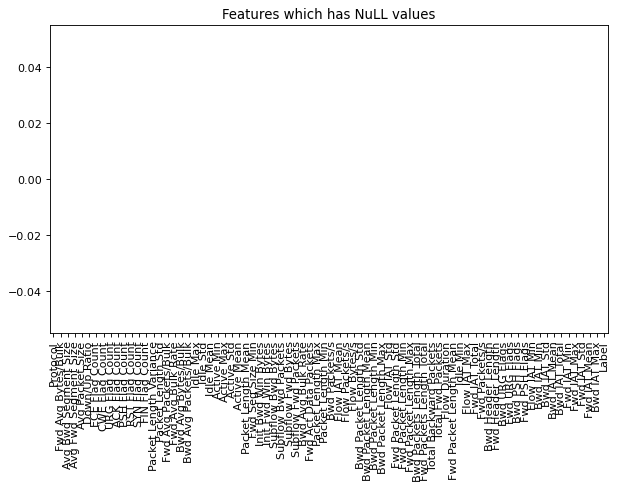

In [20]:
# Let's look at the vizualisation of Null valued features
figure(figsize=(9, 5), dpi=80)
df_train[df_train.columns[df_train.isna().sum() >= 0]].isna().sum().sort_values().plot.bar()
plt.title("Features which has NuLL values")

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125170 entries, 0 to 125169
Data columns (total 78 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Protocol                  125170 non-null  int8   
 1   Flow Duration             125170 non-null  int32  
 2   Total Fwd Packets         125170 non-null  int32  
 3   Total Backward Packets    125170 non-null  int16  
 4   Fwd Packets Length Total  125170 non-null  float32
 5   Bwd Packets Length Total  125170 non-null  float32
 6   Fwd Packet Length Max     125170 non-null  float32
 7   Fwd Packet Length Min     125170 non-null  float32
 8   Fwd Packet Length Mean    125170 non-null  float32
 9   Fwd Packet Length Std     125170 non-null  float32
 10  Bwd Packet Length Max     125170 non-null  float32
 11  Bwd Packet Length Min     125170 non-null  float32
 12  Bwd Packet Length Mean    125170 non-null  float32
 13  Bwd Packet Length Std     125170 non-null  f

<a name="EDA"></a>
## 4. Exploratory Data Analysis

In [23]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols,figsize=(18, 18))
    colors = plt.cm.Set3(np.linspace(0, 1, len(cols_list)))  # Custom color palette

    for ax, col, color in zip(axes.ravel(), cols_list, colors):
        counts = df[col].value_counts()
        wedges, texts, autotexts = ax.pie(counts, labels=counts.index, autopct='%1.0f%%', colors=plt.cm.Set3(np.random.rand(len(counts)))) 
        ax.set_title(str(col), fontsize=15)
        plt.setp(autotexts, size=10)  # Set font size for autopct labels
        
    plt.show()

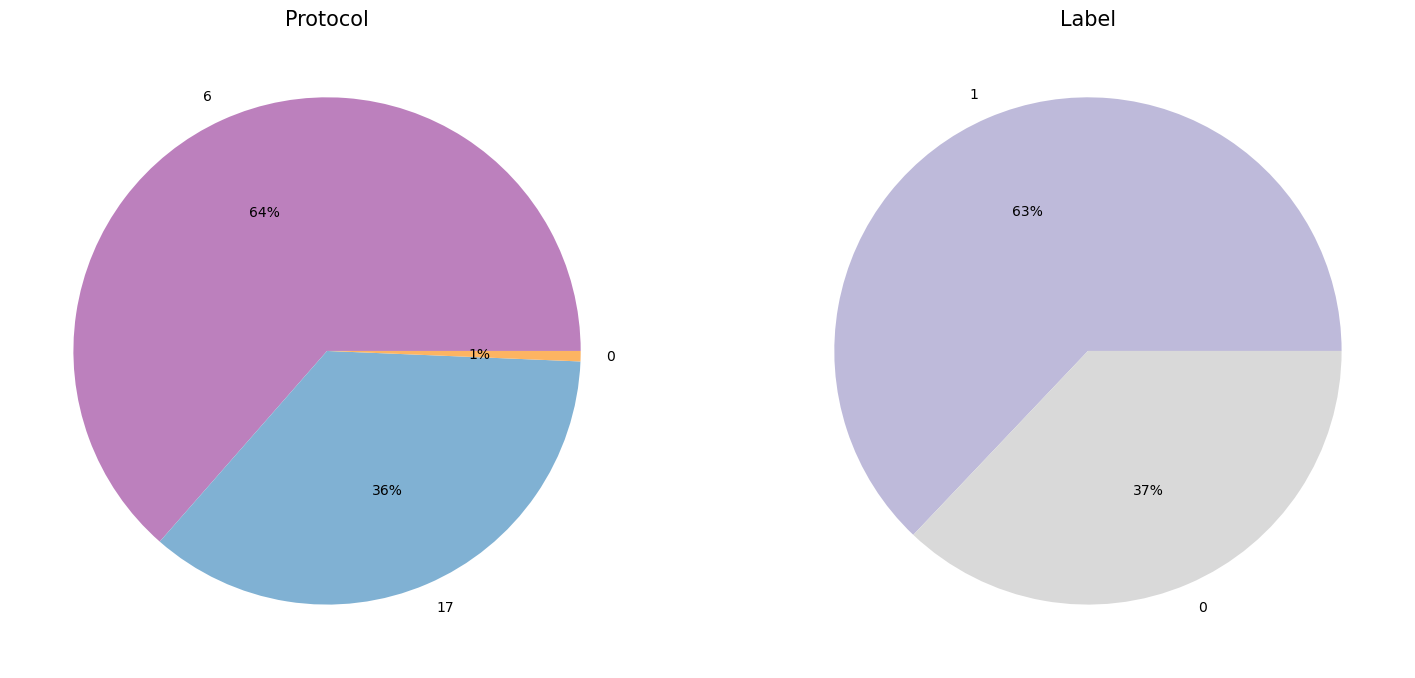

In [24]:
pie_plot(df_train, ['Protocol', 'Label'], 1, 2)

In [25]:
list(dict(df_train.Protocol.value_counts()).keys()), dict(df_train.Protocol.value_counts()).values()

([6, 17, 0], dict_values([79530, 44814, 826]))

In [26]:
list(dict(df_train[df_train.Label == 1].Protocol.value_counts()).keys()), dict(df_train[df_train.Label == 1].Protocol.value_counts()).values()

([6, 17, 0], dict_values([48894, 29825, 24]))

Text(0.5, 1.0, 'The number of requests from different protocols')

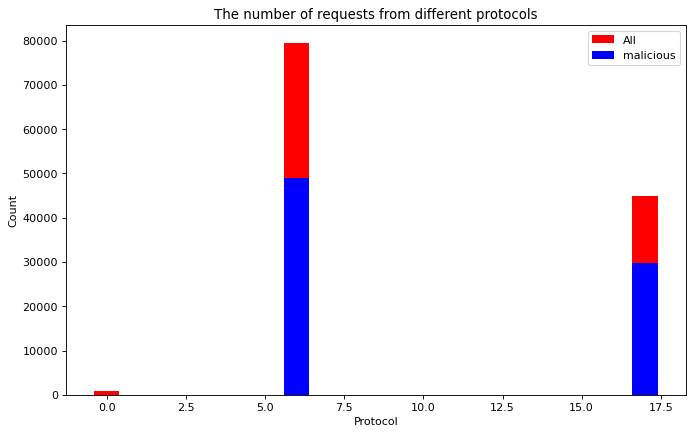

In [27]:
figure(figsize=(10, 6), dpi=80)
plt.bar(list(dict(df_train.Protocol.value_counts()).keys()), dict(df_train.Protocol.value_counts()).values(), color='r')
plt.bar(list(dict(df_train[df_train.Label == 1].Protocol.value_counts()).keys()), dict(df_train[df_train.Label == 1].Protocol.value_counts()).values(), color='b')

plt.xlabel('Protocol')
plt.ylabel('Count')
plt.legend(['All', 'malicious'])
plt.title('The number of requests from different protocols')

<AxesSubplot:xlabel='Label', ylabel='count'>

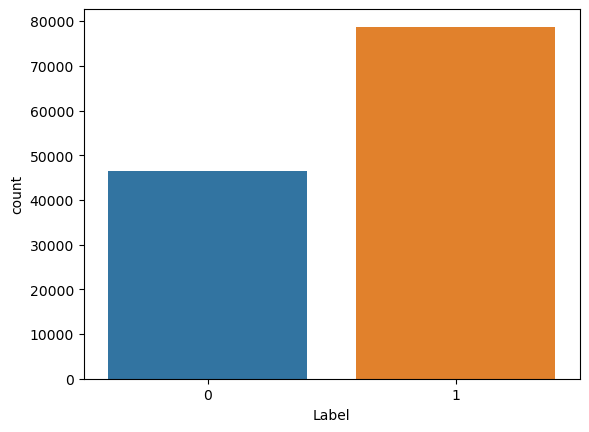

In [28]:
label_dict = dict(df_train.Label.value_counts())
sns.countplot(df_train.Label)

In [29]:
#### Let's support which columns NUMERIC and which is OBJECT

numeric_df = df_train.select_dtypes(include=['int64', 'float64', 'int8', 'int16', 'int32', 'float32'])
object_df = df_train.select_dtypes(include=['object'])
numeric_cols = numeric_df.columns
object_cols = object_df.columns
print('Numeric Columns: ')
print(numeric_cols, '\n')
print('Object Columns: ')
print(object_cols, '\n')
print('Number of Numeric Features: ', len(numeric_cols))
print('Number of Object Features: ', len(object_cols))

Numeric Columns: 
Index(['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Fla

<AxesSubplot:>

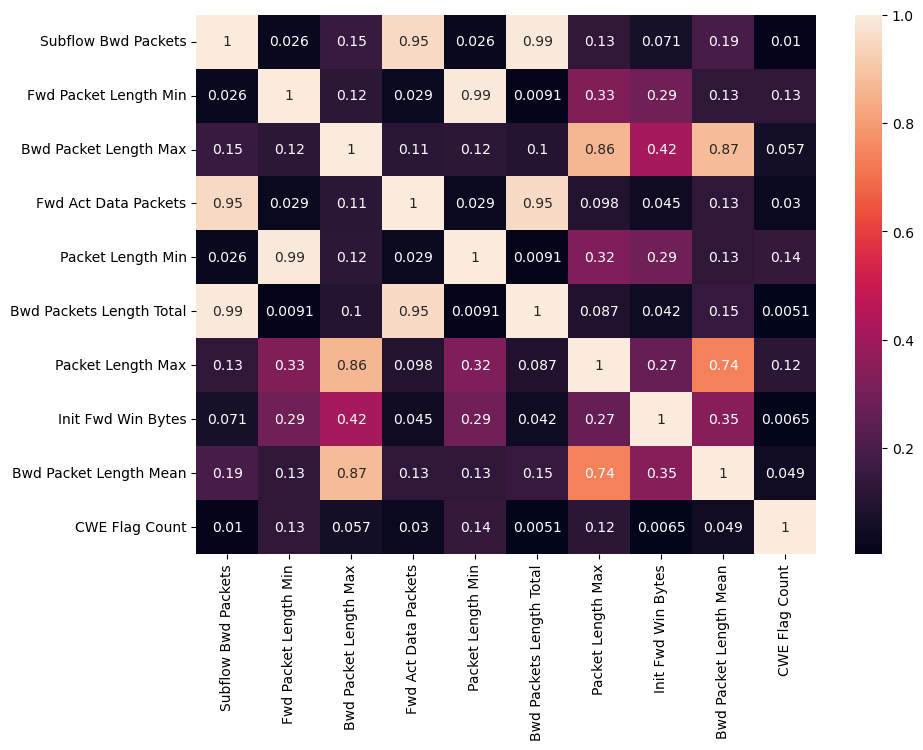

In [30]:
important_features = ['Subflow Bwd Packets', 'Fwd Packet Length Min', 'Bwd Packet Length Max', 'Fwd Act Data Packets', 'Packet Length Min', 'Bwd Packets Length Total', 'Packet Length Max', 'Init Fwd Win Bytes', 'Bwd Packet Length Mean', 'CWE Flag Count']
X = df_train[important_features]
fig, ax = plt.subplots(figsize=(10,7)) 
sns.heatmap(abs(X.corr()), annot=True)

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

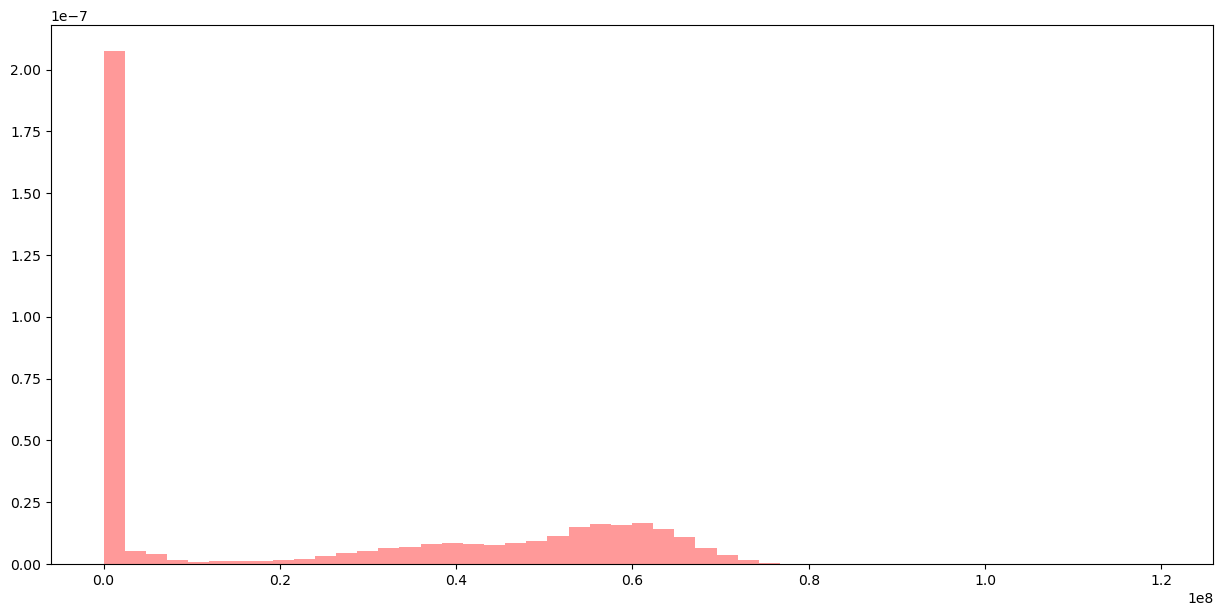

In [31]:
plt.figure(figsize=(15, 7))
sns.distplot(df_train[df_train['Label'] == 1]['Flow Duration'], color='red',label='ANOMALY')
sns.distplot(df_train[df_train['Label'] == 0]['Flow Duration'], color='green',label='NORMAL')

plt.legend()

<a name="Preprocess"></a>
## 5.  Preprocess dataset

In [23]:
# Separate features and labels for classification
X = df_train.drop('Label', axis=1)
y = df_train['Label']

In [24]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [25]:
X.shape

(125170, 77)

In [26]:
y.shape

(125170,)

In [29]:
# Split the data into train and validation sets
X_train, X_val1, y_train, y_val1 = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_val1, y_val1, test_size=0.1, random_state=0)

In [30]:
# Separate features and labels for regression
X = df_train.drop('Label', axis=1)
y_reg = df_train['Label']

# Standardize the features for regression
scaler_reg = StandardScaler()
X_reg = scaler_reg.fit_transform(X)

# Split the data into train and validation sets for regression
X_train_reg, X_val1_reg, y_train_reg, y_val1_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=0)
X_val_reg, X_test_reg, y_val_reg, y_test_reg = train_test_split(X_val1_reg, y_val1_reg, test_size=0.1, random_state=0)

In [31]:
def evaluate_regression(model, name, X_train, X_test, y_train, y_test):
    train_rmse = mean_squared_error(y_train, model.predict(X_train), squared=False)
    test_rmse = mean_squared_error(y_test, model.predict(X_test), squared=False)

    print("Training RMSE " + str(name) + ": {:.4f}".format(train_rmse))
    print("Test RMSE " + str(name) + ": {:.4f}".format(test_rmse))


In [32]:
classification_evals = {}

def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(np.array(X_train)))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(np.array(X_test)))
    train_precision = metrics.precision_score(y_train, model.predict(np.array(X_train)))
    test_precision = metrics.precision_score(y_test, model.predict(np.array(X_test)))
    train_recall = metrics.recall_score(y_train, model.predict(np.array(X_train)))
    test_recall = metrics.recall_score(y_test, model.predict(np.array(X_test)))

    classification_evals[name] = {
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Train Precision': train_precision,
        'Test Precision': test_precision,
        'Train Recall': train_recall,
        'Test Recall': test_recall
    }

    print("Training Accuracy " + str(name) + ": {:.2f}".format(train_accuracy * 100))
    print("Test Accuracy " + str(name) + ": {:.2f}".format(test_accuracy * 100))
    print("Training Precision " + str(name) + ": {:.2f}".format(train_precision * 100))
    print("Test Precision " + str(name) + ": {:.2f}".format(test_precision * 100))
    print("Training Recall " + str(name) + ": {:.2f}".format(train_recall * 100))
    print("Test Recall " + str(name) + ": {:.2f}".format(test_recall * 100))

    # Plot the confusion matrix
    actual = y_test
    predicted = model.predict(np.array(X_test))
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['normal','attack'])

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.grid(False)
    cm_display.plot(ax=ax)


<a name="Modelling"></a>
## 6.  Model Building

### Logistic Regression

Training Accuracy Logistic Regression: 91.24
Test Accuracy Logistic Regression: 91.03
Training Precision Logistic Regression: 96.50
Test Precision Logistic Regression: 96.29
Training Recall Logistic Regression: 89.31
Test Recall Logistic Regression: 89.29


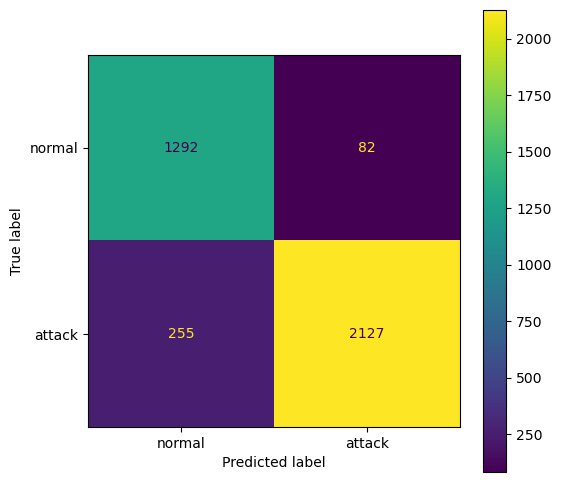

In [33]:
lr = LogisticRegression().fit(X_train, y_train)
evaluate_classification(lr, "Logistic Regression", X_train, X_test, y_train, y_test)

#### Knearest neighbors

Training Accuracy KNeighborsClassifier: 99.35
Test Accuracy KNeighborsClassifier: 99.39
Training Precision KNeighborsClassifier: 99.33
Test Precision KNeighborsClassifier: 99.33
Training Recall KNeighborsClassifier: 99.64
Test Recall KNeighborsClassifier: 99.71


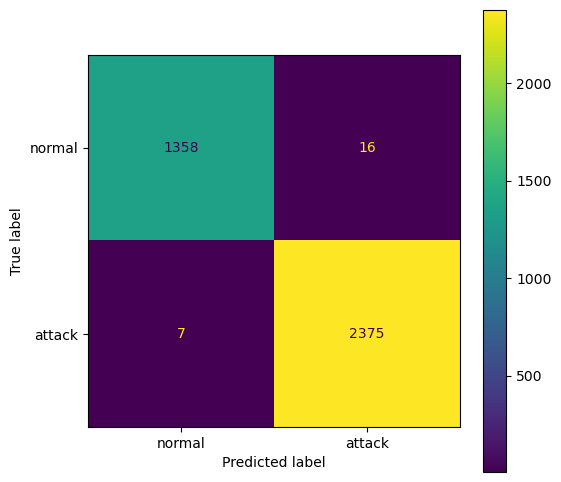

In [38]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
evaluate_classification(knn, "KNeighborsClassifier", X_train, X_test, y_train, y_test)

In [35]:
# index = 0
# maxi = 0
# for i in range(1, 41):
#     knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
#     accuracy_score = metrics.accuracy_score(y_test, knn.predict(np.array(X_test)))
#     print(accuracy_score + "\n")
    
#     if accuracy_score > maxi:
#         maxi = accuracy_score
#         index = i
        
# print(maxi, index)

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('int32'), dtype('<U1')) -> None

### Naive Bayes

Training Accuracy GaussianNB: 98.55
Test Accuracy GaussianNB: 98.59
Training Precision GaussianNB: 98.31
Test Precision GaussianNB: 98.42
Training Recall GaussianNB: 99.40
Test Recall GaussianNB: 99.37


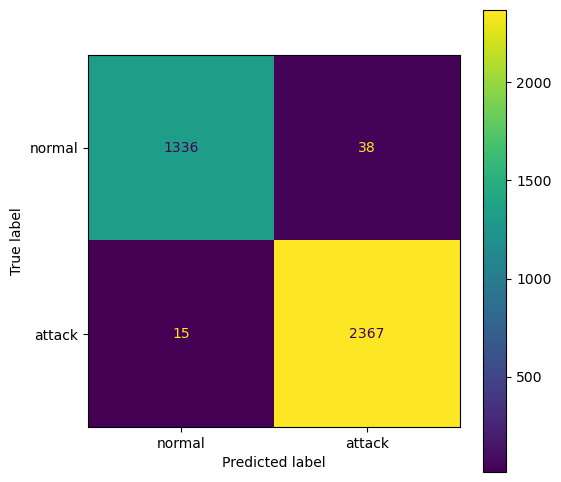

In [31]:
gnb = GaussianNB().fit(X_train, y_train)
evaluate_classification(gnb, "GaussianNB", X_train, X_test, y_train, y_test)

### SVM

Training Accuracy Linear SVC(LBasedImpl): 99.47
Test Accuracy Linear SVC(LBasedImpl): 99.44
Training Precision Linear SVC(LBasedImpl): 99.63
Test Precision Linear SVC(LBasedImpl): 99.66
Training Recall Linear SVC(LBasedImpl): 99.52
Test Recall Linear SVC(LBasedImpl): 99.45


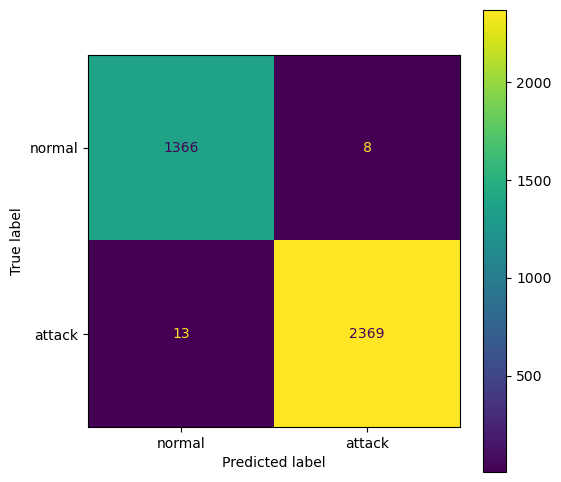

In [32]:
lin_svc = svm.LinearSVC().fit(X_train, y_train)
evaluate_classification(lin_svc, "Linear SVC(LBasedImpl)", X_train, X_test, y_train, y_test)

### Decision Tree

Training Accuracy DecisionTreeClassifier: 100.00
Test Accuracy DecisionTreeClassifier: 99.97
Training Precision DecisionTreeClassifier: 100.00
Test Precision DecisionTreeClassifier: 100.00
Training Recall DecisionTreeClassifier: 100.00
Test Recall DecisionTreeClassifier: 99.96


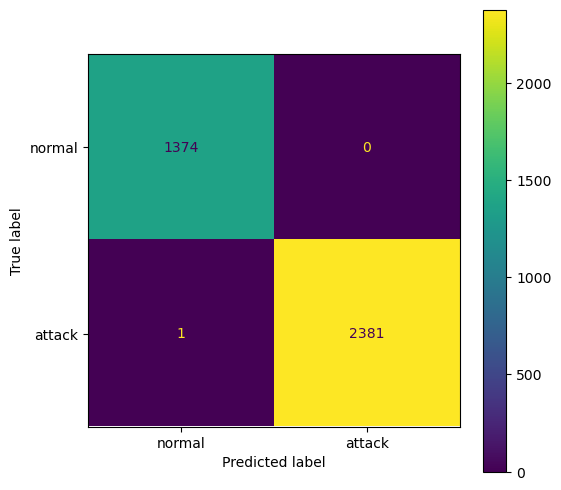

In [45]:
dt = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
tdt = DecisionTreeClassifier().fit(X_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", X_train, X_test, y_train, y_test)

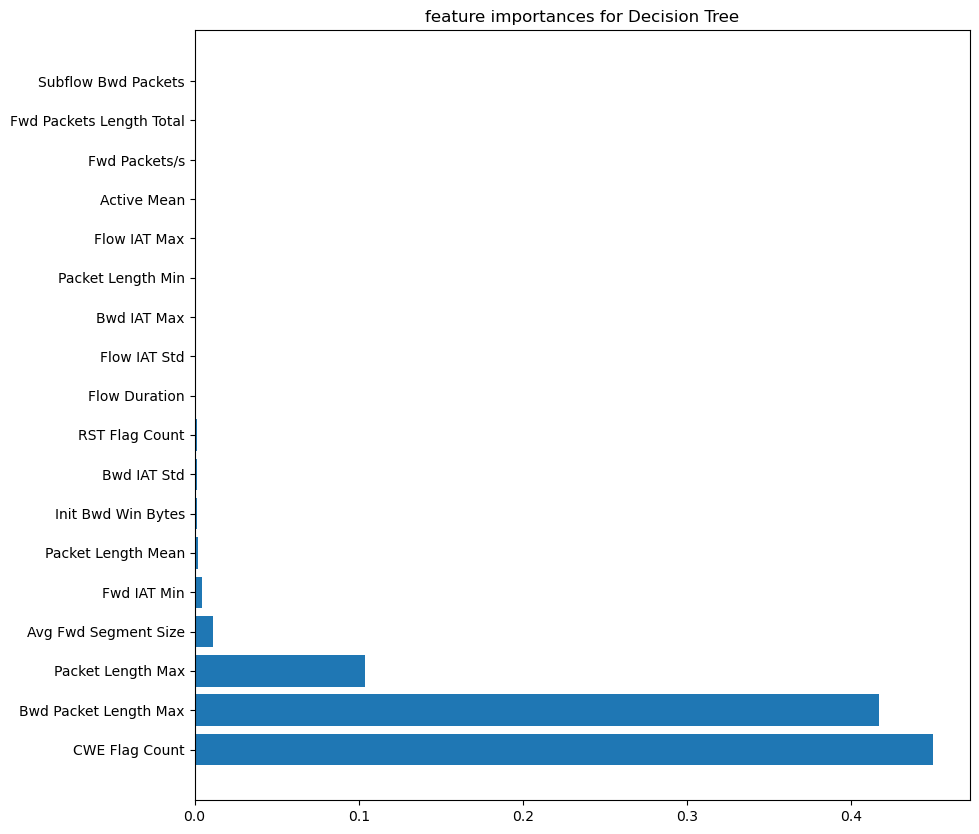

('ACK Flag Count', 'Active Max', 'Active Min', 'Active Std', 'Avg Bwd Segment Size', 'Bwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd IAT Min', 'Bwd IAT Total', 'Bwd PSH Flags', 'Bwd Packet Length Min', 'Bwd URG Flags', 'Down/Up Ratio', 'ECE Flag Count', 'FIN Flag Count', 'Fwd Avg Bulk Rate', 'Fwd Avg Packets/Bulk', 'Fwd Header Length', 'Fwd IAT Max', 'Fwd IAT Mean', 'Fwd PSH Flags', 'Fwd URG Flags', 'Idle Max', 'Idle Min', 'Idle Std', 'PSH Flag Count', 'Packet Length Variance', 'SYN Flag Count', 'Subflow Bwd Bytes', 'Subflow Fwd Packets', 'Total Backward Packets', 'URG Flag Count', 'Bwd Packets Length Total', 'Bwd Packet Length Mean', 'Bwd IAT Mean', 'Fwd IAT Std', 'Idle Mean', 'Avg Packet Size', 'Flow Bytes/s', 'Flow IAT Mean', 'Fwd IAT Total', 'Subflow Fwd Bytes', 'Protocol', 'Fwd Avg Bytes/Bulk', 'Fwd Seg Size Min', 'Fwd Packet Length Min', 'Bwd Packet Length Std', 'Init Fwd Win Bytes', 'Fwd Packet Length Std', 'Fwd Packet Length Max', 'Flow Packets/s', 'Fwd 

In [48]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
    
    plt.figure(figsize=(10,10))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for Decision Tree')
    plt.show()
    print(names)

features_names = df_train.drop(['Bwd Packets/s', 'Label'] , axis = 1)
f_importances(abs(tdt.feature_importances_), features_names, top=18)

[Text(0.5769230769230769, 0.875, 'X[10] <= -0.231\ngini = 0.467\nsamples = 87619\nvalue = [32506, 55113]'),
 Text(0.3076923076923077, 0.625, 'X[48] <= 0.905\ngini = 0.338\nsamples = 70172\nvalue = [15115, 55057]'),
 Text(0.15384615384615385, 0.375, 'X[38] <= -0.486\ngini = 0.088\nsamples = 57597\nvalue = [2664, 54933]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.039\nsamples = 2340\nvalue = [2294, 46]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.013\nsamples = 55257\nvalue = [370, 54887]'),
 Text(0.46153846153846156, 0.375, 'X[36] <= -0.329\ngini = 0.02\nsamples = 12575\nvalue = [12451, 124]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.161\nsamples = 681\nvalue = [621, 60]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.011\nsamples = 11894\nvalue = [11830, 64]'),
 Text(0.8461538461538461, 0.625, 'X[19] <= 2.637\ngini = 0.006\nsamples = 17447\nvalue = [17391, 56]'),
 Text(0.7692307692307693, 0.375, 'X[7] <= -0.096\ngini = 0.006\nsamples = 17445\nvalue = [17391, 54]'),
 Text(0.69230

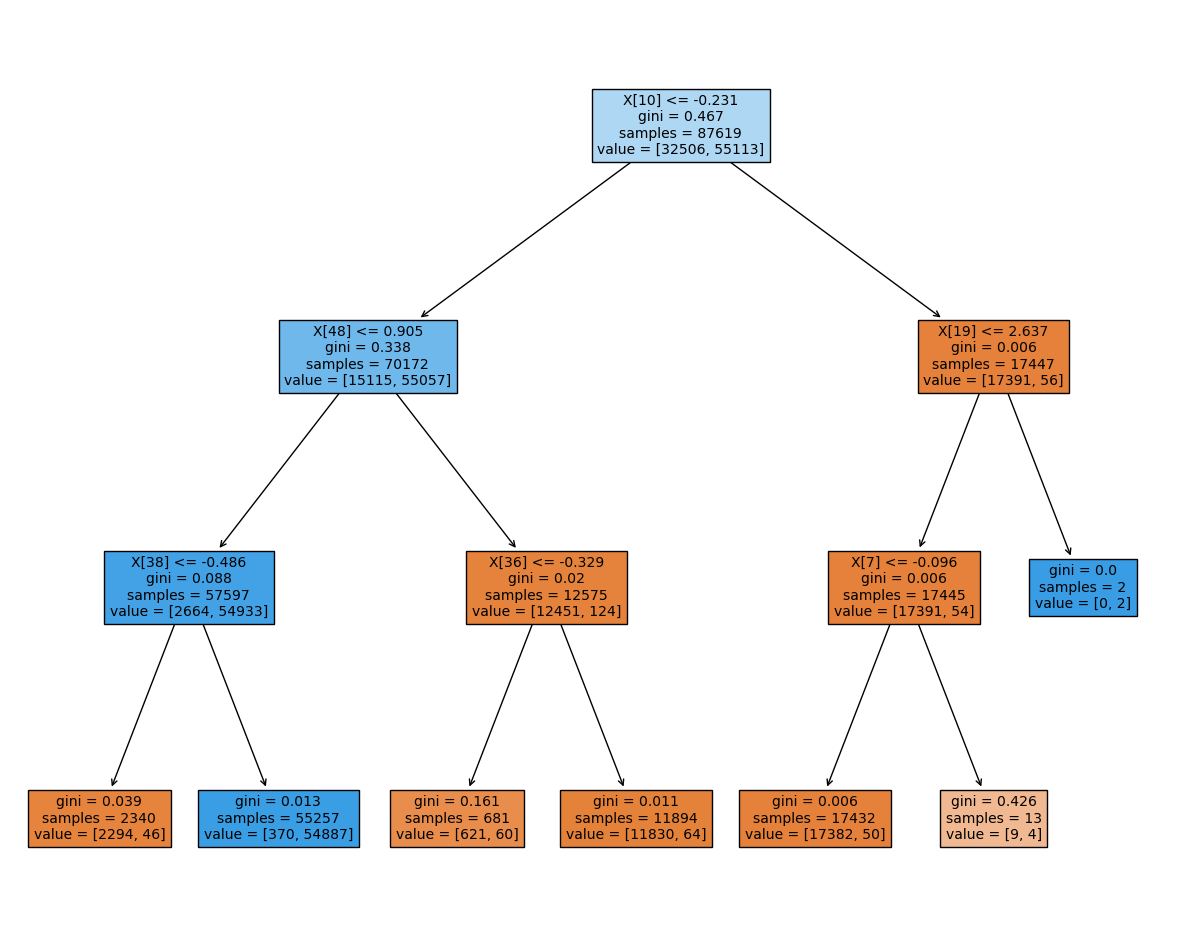

In [35]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(dt , filled=True)

## Random forest

Training Accuracy RandomForestClassifier: 100.00
Test Accuracy RandomForestClassifier: 99.92
Training Precision RandomForestClassifier: 100.00
Test Precision RandomForestClassifier: 100.00
Training Recall RandomForestClassifier: 100.00
Test Recall RandomForestClassifier: 99.87


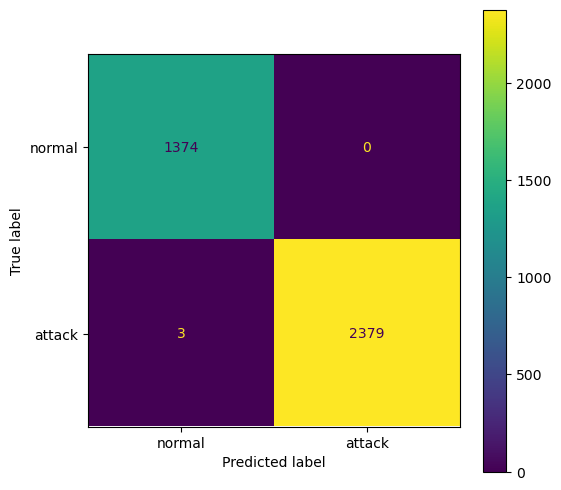

In [52]:
rf = RandomForestClassifier().fit(X_train, y_train)
evaluate_classification(rf, "RandomForestClassifier", X_train, X_test, y_train, y_test)

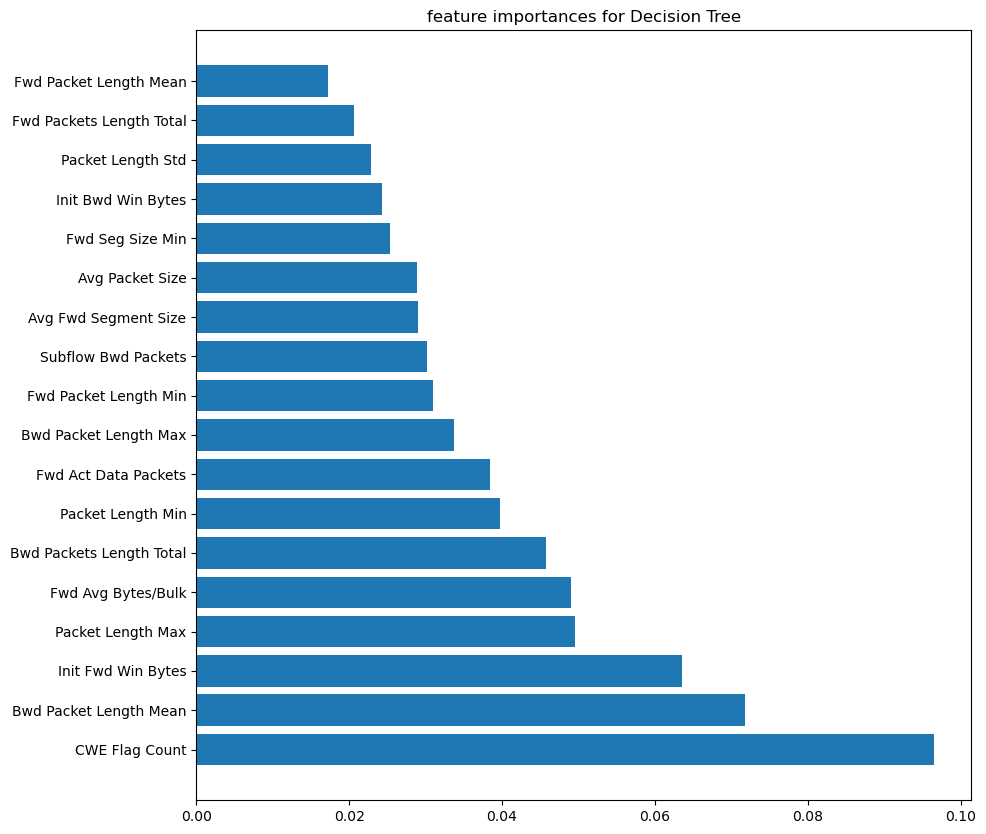

('ACK Flag Count', 'Bwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd PSH Flags', 'Bwd URG Flags', 'Down/Up Ratio', 'Fwd Avg Bulk Rate', 'Fwd Avg Packets/Bulk', 'Fwd URG Flags', 'SYN Flag Count', 'Subflow Fwd Packets', 'Active Max', 'Idle Std', 'Fwd Header Length', 'Active Min', 'Idle Min', 'Bwd IAT Std', 'RST Flag Count', 'Active Mean', 'Bwd IAT Max', 'Active Std', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd Header Length', 'Bwd IAT Min', 'Bwd Packet Length Std', 'Flow IAT Min', 'Fwd IAT Min', 'Fwd Packet Length Std', 'Flow Bytes/s', 'Idle Mean', 'Total Backward Packets', 'Idle Max', 'Flow IAT Max', 'Fwd IAT Mean', 'Flow IAT Std', 'Fwd Packet Length Max', 'Protocol', 'Flow Duration', 'Subflow Fwd Bytes', 'Subflow Bwd Bytes', 'Fwd IAT Max', 'Packet Length Variance', 'Fwd IAT Std', 'Flow Packets/s', 'FIN Flag Count', 'Fwd IAT Total', 'Fwd PSH Flags', 'PSH Flag Count', 'URG Flag Count', 'Bwd Packet Length Min', 'Avg Bwd Segment Size', 'Flow IAT Mean', 'Fwd Packets/s', 'Pac

In [53]:
f_importances(abs(rf.feature_importances_), features_names, top=18)

### XGBOOST Regressor in order to predict threat level

In [37]:
# Train XGBoost regressor
xg_r = xgb.XGBRegressor(objective='reg:linear', n_estimators=20).fit(X_train_reg, y_train_reg)

In [38]:
name = "XGBOOST"
train_error = metrics.mean_squared_error(y_train_reg, xg_r.predict(X_train_reg), squared=False)
test_error = metrics.mean_squared_error(y_test_reg, xg_r.predict(X_test_reg), squared=False)
print("Training Error " + str(name) + ": {:.4f}".format(train_error))
print("Test Error " + str(name) + ": {:.4f}".format(test_error))

Training Error XGBOOST: 0.0211
Test Error XGBOOST: 0.0229


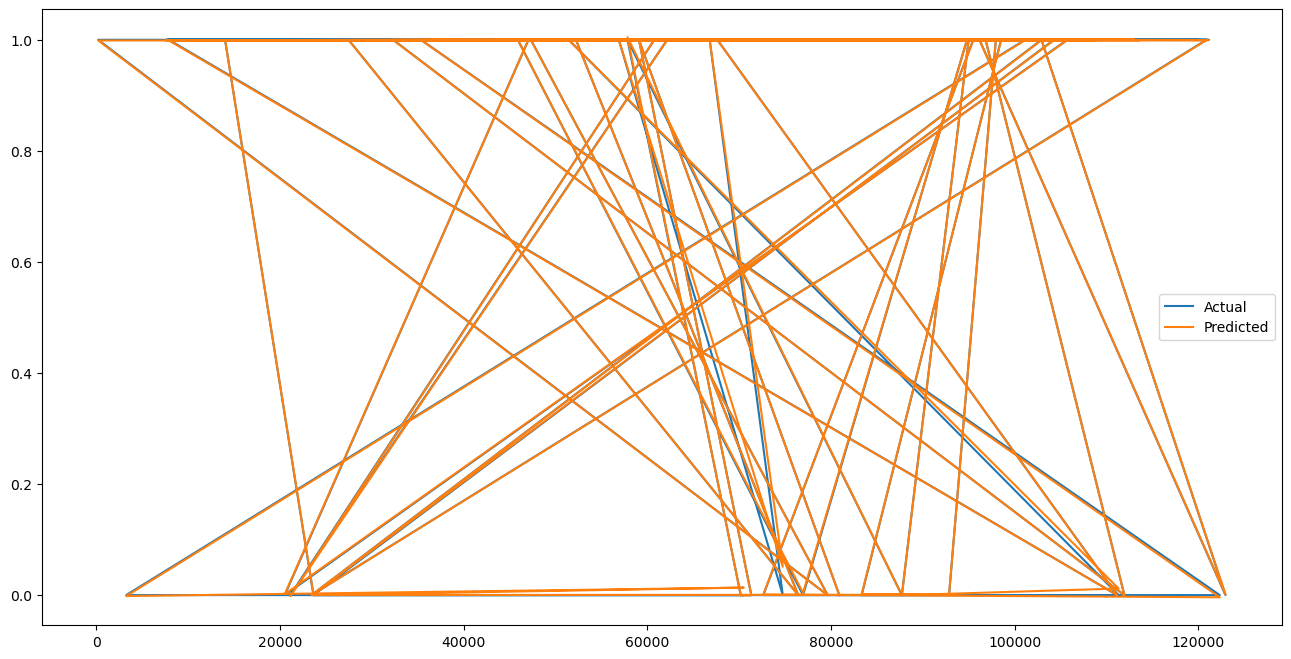

In [39]:
y_pred = xg_r.predict(X_test_reg)
df = pd.DataFrame({"Y_test": y_test_reg, "Y_pred": y_pred})
plt.figure(figsize=(16, 8))
plt.plot(df[:80])
plt.legend(['Actual', 'Predicted'])
plt.show()

### Bagging Ensemble

In [40]:

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.model_selection import train_test_split

In [41]:
# Create base classifiers for the ensemble
base_classifier_dt = DecisionTreeClassifier()
base_classifier_lr = LogisticRegression()
base_classifier_knn = KNeighborsClassifier(n_neighbors=20)
base_classifier_nb = GaussianNB()
base_classifier_svc = CalibratedClassifierCV(LinearSVC())
base_classifier_xgb = xgb.XGBClassifier()

In [42]:
# Create the bagging ensemble
bagging_classifier = BaggingClassifier(base_classifier_dt, n_estimators=20)

In [43]:
# Fit the bagging ensemble on the training data
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20)

Training Accuracy Bagging Ensemble: 99.99
Test Accuracy Bagging Ensemble: 99.95
Training Precision Bagging Ensemble: 100.00
Test Precision Bagging Ensemble: 100.00
Training Recall Bagging Ensemble: 99.99
Test Recall Bagging Ensemble: 99.92


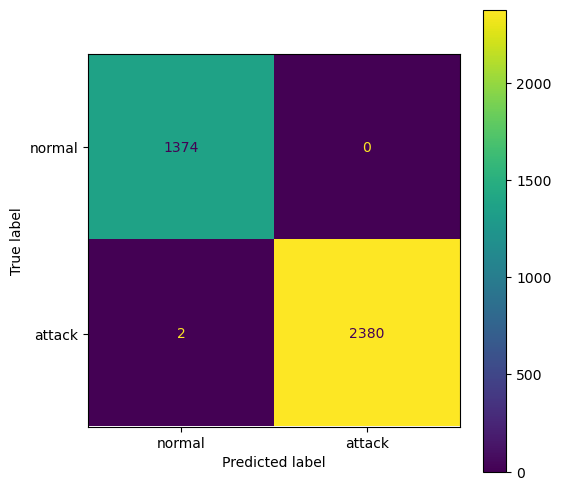

In [44]:
# Evaluate the bagging ensemble
evaluate_classification(bagging_classifier, "Bagging Ensemble", X_train, X_test, y_train, y_test)


### Voting Ensemble

In [46]:
voting_classifier = VotingClassifier(
    estimators=[
        ('lr', base_classifier_lr),
        ('knn', base_classifier_knn),
        ('nb', base_classifier_nb),
        ('svc', base_classifier_svc),
        ('xgb', base_classifier_xgb)
    ],
    voting='soft'  # Use 'soft' voting for probabilities, or 'hard' for majority voting
)

In [47]:
# Fit the voting ensemble on the training data
voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier(n_neighbors=20)),
                             ('nb', GaussianNB()),
                             ('svc',
                              CalibratedClassifierCV(base_estimator=LinearSVC())),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=Non...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                

Training Accuracy Voting Ensemble: 99.67
Test Accuracy Voting Ensemble: 99.65
Training Precision Voting Ensemble: 99.89
Test Precision Voting Ensemble: 99.96
Training Recall Voting Ensemble: 99.58
Test Recall Voting Ensemble: 99.50


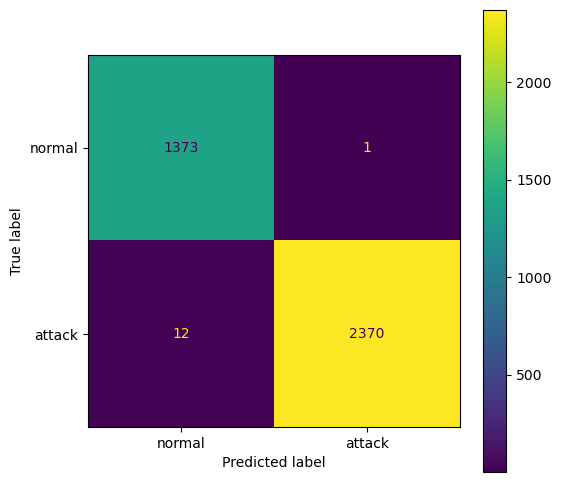

In [48]:
# Evaluate the voting ensemble
evaluate_classification(voting_classifier, "Voting Ensemble", X_train, X_test, y_train, y_test)

### XGB Classification

In [49]:
base_classifier_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Training Accuracy XGBoost: 100.00
Test Accuracy XGBoost: 99.95
Training Precision XGBoost: 100.00
Test Precision XGBoost: 100.00
Training Recall XGBoost: 100.00
Test Recall XGBoost: 99.92


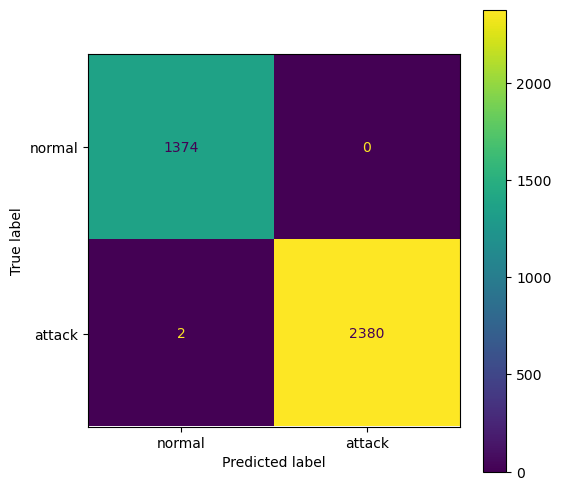

In [50]:
evaluate_classification(base_classifier_xgb, "XGBoost", X_train, X_test, y_train, y_test)

## Neural Networks

In [120]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_train.shape[1:]), 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=128, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=512, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=128, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=1, activation='sigmoid'),
])

In [121]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [122]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 64)                  │           4,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 145,153 (567.00 KB)

 Trainable params: 145,153 (567.00 KB)

 Non-trainable params: 0 (0.00 B)

In [123]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [124]:
# Assuming you have defined the Keras model as 'model'
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [125]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=1)

Epoch 1/10
2739/2739 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9715 - loss: 0.2111 - val_accuracy: 0.9960 - val_loss: 0.0617
Epoch 2/10
2739/2739 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9948 - loss: 0.0642 - val_accuracy: 0.9960 - val_loss: 0.0454
Epoch 3/10
2739/2739 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9952 - loss: 0.0482 - val_accuracy: 0.9891 - val_loss: 0.0576
Epoch 4/10
2739/2739 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9949 - loss: 0.0427 - val_accuracy: 0.9960 - val_loss: 0.0347
Epoch 5/10
2739/2739 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9953 - loss: 0.0419 - val_accuracy: 0.9963 - val_loss: 0.0329
Epoch 6/10
2739/2739 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9952 - loss: 0.0439 - val_accuracy: 0.9965 - val_loss: 0.0338
Epoch 7/10
2739/2739 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9954 - loss: 0.0401 - val_accuracy: 0.9963 - val_loss: 0.0318
Epoch 8/10
2739/2739 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9959 - loss: 0.0377 -

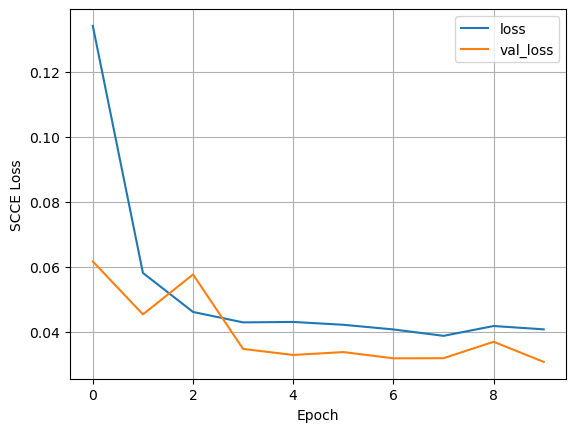

In [132]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('SCCE Loss')
plt.legend()
plt.grid(True)

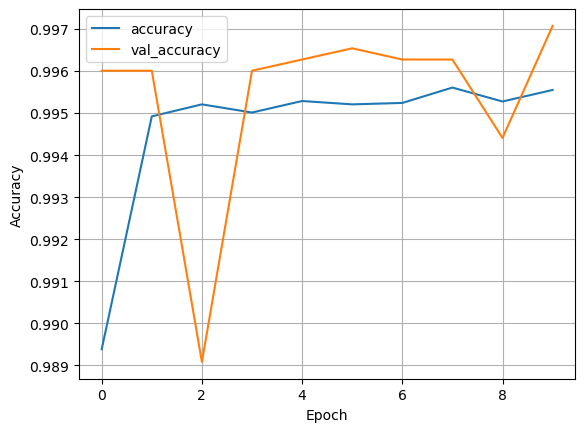

In [133]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

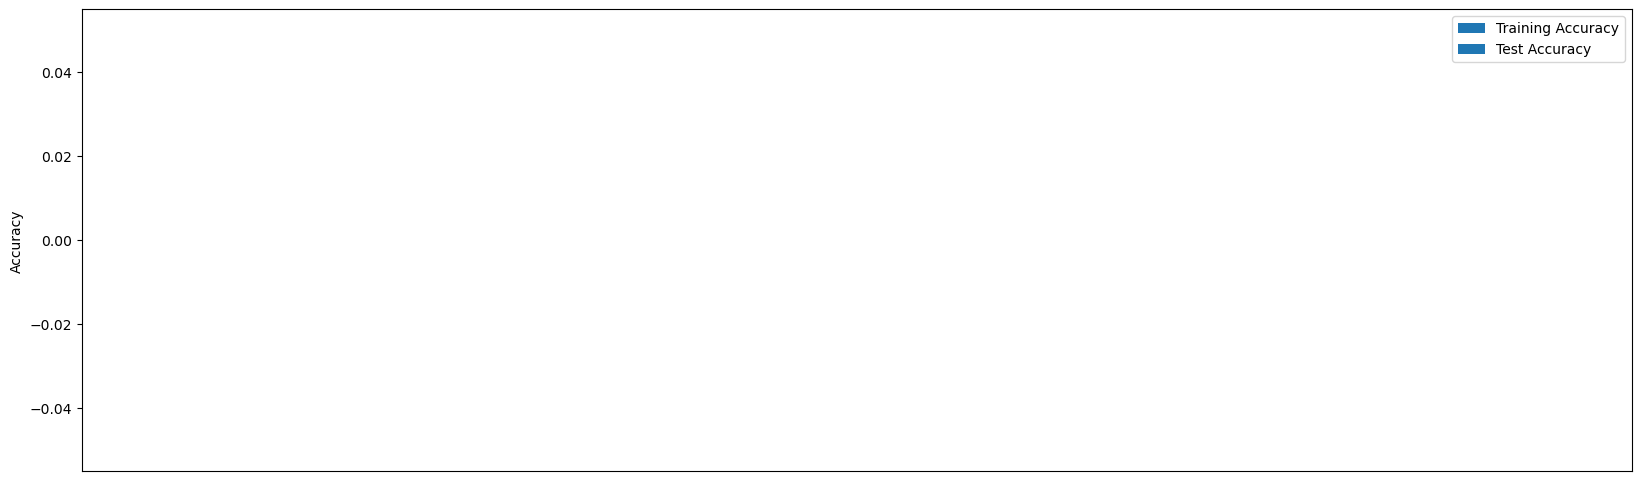

In [134]:
keys = list(classification_evals.keys())
values = list(classification_evals.values())
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value['Train Accuracy'] for value in values], color='darkred', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value['Test Accuracy'] for value in values], color='y', width=0.25, align='center')
ax.legend(["Training Accuracy", "Test Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Accuracy")
plt.show()

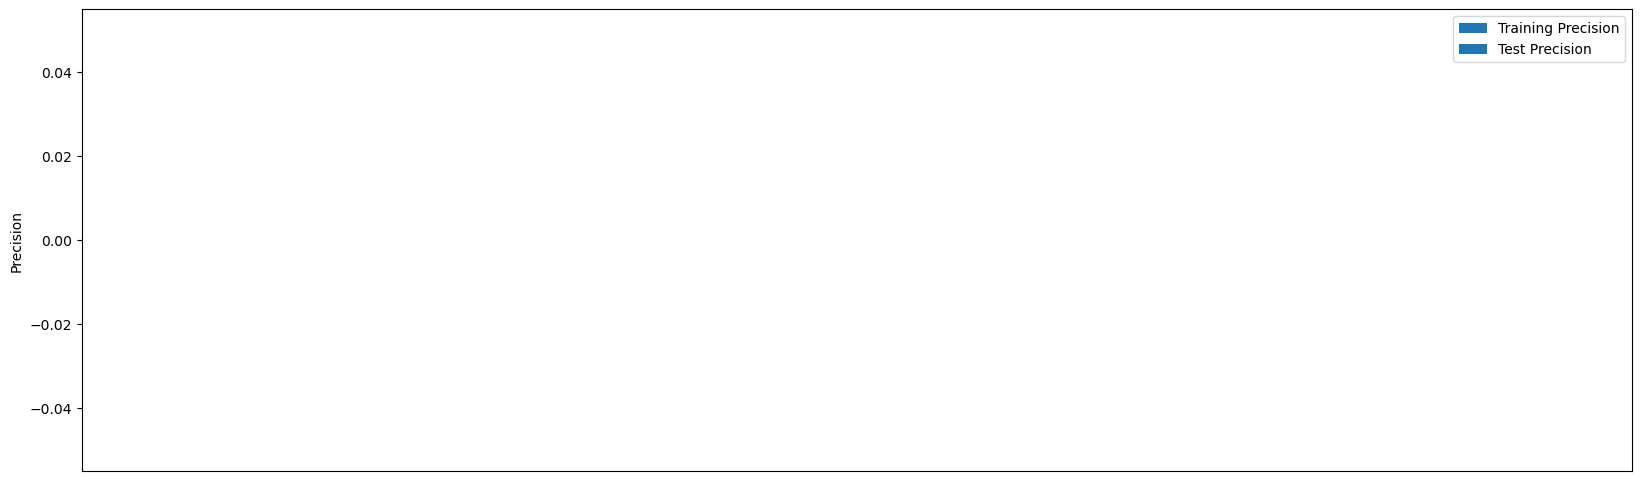

In [135]:
keys = list(classification_evals.keys())
values = list(classification_evals.values())
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value['Train Precision'] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value['Test Precision'] for value in values], color='y', width=0.25, align='center')
ax.legend(["Training Precision", "Test Precision"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Precision")
plt.show()

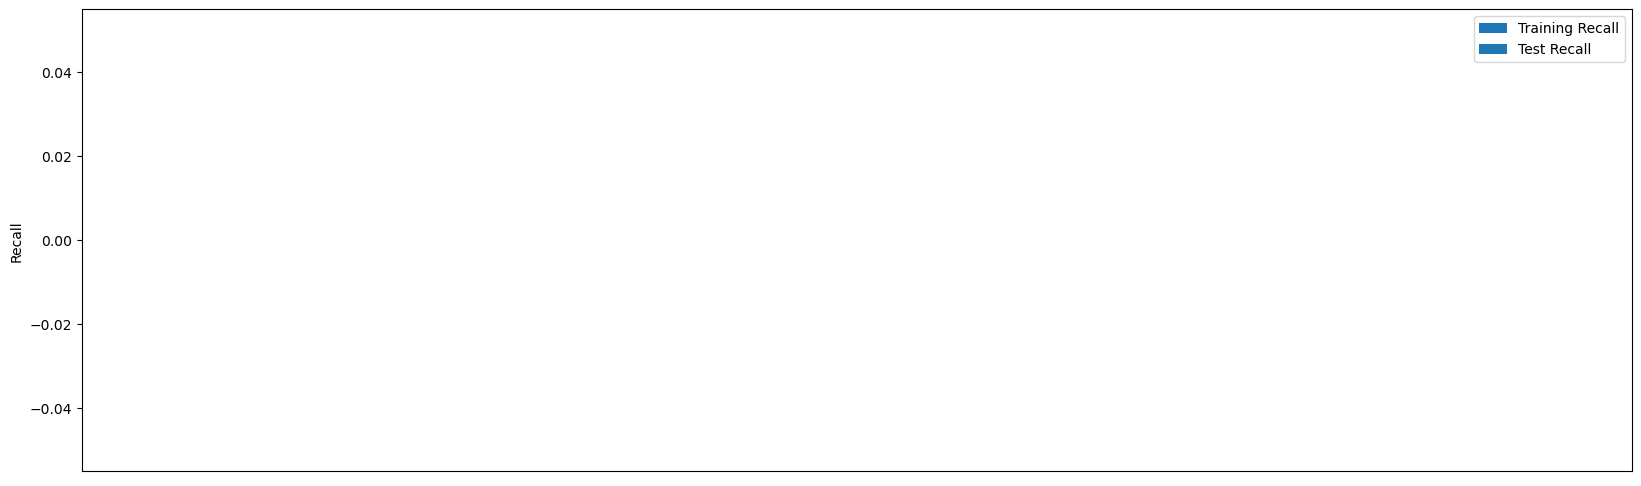

In [136]:
keys = list(classification_evals.keys())
values = list(classification_evals.values())
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value['Train Recall'] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value['Test Recall'] for value in values], color='y', width=0.25, align='center')
ax.legend(["Training Recall", "Test Recall"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Recall")
plt.show()